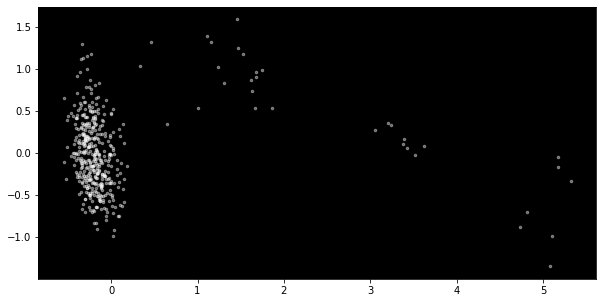

In [38]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
f1=open('bing.txt','r')#疾病结点
f2=open('fang.txt','r')#方剂结点

line1=f1.readlines()
line2=f2.readlines()
bi=[]
for line in line1:
    line=line.replace('\n','')#换行符换为空格
    x=line.split(' ')#再以空格为分隔符
    bi.append(x)#添加


fa=[]#同样操作
for line in line2:
    line=line.replace('\n','')
    x=line.split(' ')
    fa.append(x)


import numpy as np#矩阵化

bi_a=np.array(bi)

fa_a=np.array(fa)


label1=bi_a[:,0]#取出所有第0列的元素


fe1=bi_a[:,1:]#取出第1列以后的元素
fe1= fe1.astype(np.float64)#数据类型
label1= label1.astype(np.int)#0列元素类型


label2=fa_a[:,0]#同样的操作
fe2=fa_a[:,1:]
fe2= fe2.astype(np.float64)
label2= label2.astype(np.int)


from sklearn.model_selection import train_test_split#划分数据集

train_X,test_X, train_y, test_y = train_test_split(fe1,label1,test_size=0.2)#28开，向量信息->结点信息
from sklearn.decomposition import PCA
# 利用PCA算法进行降维
X_reduced = PCA(n_components=2).fit_transform(fe1)


# 绘制所有单词向量的二维空间投影
fig = plt.figure(figsize = (10, 5))
ax = fig.gca()
ax.set_facecolor('black')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 5, alpha = 0.4, color = 'white')

In [39]:
from math import sqrt
from sklearn.metrics.pairwise import cosine_similarity

def knn(x,k):#对相应的药方进行knn
    dis1=[]
    for g in fe2:
        dis=cosine_similarity([g, x])
        dis=dis[1][0]
        dis1.append(dis)
    dis1 = np.array(dis1)
    nearest = dis1.argsort()[::-1]
    topK_k=[label2[i] for i in nearest[:k]]#得到对应的index
    p=0
    ans =[]
    print('匹配的药方如下：')
    for h in nearest[:k]:
        print(topK_k[p])
        ans.append(topK_k[p])
        p = p + 1
    return ans 

In [56]:
err=0
predicted =[]
j=0
ll=list(fe2)
te=list(test_X)#相应的测试集，fe和lable
ty=list(test_y)
f4=open('graph_edges_bing-fang-relation.txt','r')

dic={}
all1=[]
set1=set()
set2=set()
lines=f4.readlines()#获取对应关系
for line in lines:
    line=line.replace('\n','')
    x=line.split(' ')
    set1.add(x[0])
    set2.add(x[1])
    all1.append(x)
print(len(set1))
print(len(set2))

for k in set2:
    v=[]
    for i in all1:
        if k in i:
            v.append(i[0])
    dic[k]=v
j=0
test_X=list(test_X)
ri=0
for x in test_X:
    print('*************',j,'*************')
    print(test_y[j])
    ans=knn(x,15)#对测试集方剂找出所有15个最相似
    # fang=[]
    fang=dic.get(str(test_y[j]))
    fang=list(map(int,fang))
    print('该病对应的全部药方是：',fang)
    print('推荐的全部药方是：',ans)
    ins=list(set(fang).intersection(set(ans)))
    if(len(ins)!=0):
        ri=ri+1
    j=j+1
print("test 个数为：",len(test_X))
print("hit 个数为：",ri)
print("命中率为：",ri/len(test_X))

1709
451
************* 0 *************
3469
匹配的药方如下：
3468
1093
2417
2519
1863
2900
2544
818
2773
965
2654
2085
2769
314
1134
该病对应的全部药方是： [3468]
推荐的全部药方是： [3468, 1093, 2417, 2519, 1863, 2900, 2544, 818, 2773, 965, 2654, 2085, 2769, 314, 1134]
************* 1 *************
2774
匹配的药方如下：
2773
1231
1793
893
314
2519
2544
2654
1134
1709
818
2900
3633
1177
3525
该病对应的全部药方是： [2773]
推荐的全部药方是： [2773, 1231, 1793, 893, 314, 2519, 2544, 2654, 1134, 1709, 818, 2900, 3633, 1177, 3525]
************* 2 *************
3556
匹配的药方如下：
1523
3555
3013
1610
3577
3080
3560
2499
1323
3064
2385
2001
529
2936
3069
该病对应的全部药方是： [3555]
推荐的全部药方是： [1523, 3555, 3013, 1610, 3577, 3080, 3560, 2499, 1323, 3064, 2385, 2001, 529, 2936, 3069]
************* 3 *************
1389
匹配的药方如下：
1388
1632
1267
3494
2413
2484
2253
2230
2876
2189
454
2499
1634
2511
1138
该病对应的全部药方是： [1388]
推荐的全部药方是： [1388, 1632, 1267, 3494, 2413, 2484, 2253, 2230, 2876, 2189, 454, 2499, 1634, 2511, 1138]
************* 4 *************
1349
匹配的药方如下：
3117
17

匹配的药方如下：
1941
1528
2808
3655
2483
3628
2606
3437
3549
1250
1230
1824
1594
1303
1261
该病对应的全部药方是： [0, 269, 287, 379, 423, 456, 528, 608, 719, 729, 792, 933, 1230, 1250, 1261, 1274, 1303, 1422, 1483, 1525, 1528, 1536, 1576, 1594, 1621, 1668, 1688, 1760, 1824, 1844, 1854, 1883, 1891, 1941, 2051, 2127, 2148, 2159, 2232, 2236, 2240, 1483, 2297, 2299, 2301, 2309, 2311, 2388, 2483, 2495, 2514, 2542, 2606, 2688, 2730, 2752, 2766, 2808, 2886, 2887, 2947, 2978, 3106, 3209, 3246, 3264, 3312, 3350, 3415, 3435, 3437, 3439, 3446, 3549, 3591, 3623, 3628, 3655]
推荐的全部药方是： [1941, 1528, 2808, 3655, 2483, 3628, 2606, 3437, 3549, 1250, 1230, 1824, 1594, 1303, 1261]
************* 35 *************
1449
匹配的药方如下：
738
59
3344
3080
1007
1773
3560
1523
1634
2587
1448
2086
487
3345
2736
该病对应的全部药方是： [1448, 1773, 3042]
推荐的全部药方是： [738, 59, 3344, 3080, 1007, 1773, 3560, 1523, 1634, 2587, 1448, 2086, 487, 3345, 2736]
************* 36 *************
2564
匹配的药方如下：
3399
2563
3378
1702
2511
963
3511
1007
2915
3339
2001
2506


2313
匹配的药方如下：
2312
222
3448
2726
2001
3494
3080
2179
1693
3568
3577
1631
2086
1610
3344
该病对应的全部药方是： [2312]
推荐的全部药方是： [2312, 222, 3448, 2726, 2001, 3494, 3080, 2179, 1693, 3568, 3577, 1631, 2086, 1610, 3344]
************* 65 *************
894
匹配的药方如下：
893
1231
1793
2773
2519
2654
2544
1134
1709
314
818
2900
1177
3633
3525
该病对应的全部药方是： [893]
推荐的全部药方是： [893, 1231, 1793, 2773, 2519, 2654, 2544, 1134, 1709, 314, 818, 2900, 1177, 3633, 3525]
************* 66 *************
1899
匹配的药方如下：
3293
2562
1898
3577
2876
2499
3339
800
2111
3080
487
1632
3431
2587
2385
该病对应的全部药方是： [1898, 2562, 3293]
推荐的全部药方是： [3293, 2562, 1898, 3577, 2876, 2499, 3339, 800, 2111, 3080, 487, 1632, 3431, 2587, 2385]
************* 67 *************
1455
匹配的药方如下：
1454
2736
565
222
1568
1913
1610
1267
2499
2962
2253
2771
529
3064
2529
该病对应的全部药方是： [1454]
推荐的全部药方是： [1454, 2736, 565, 222, 1568, 1913, 1610, 1267, 2499, 2962, 2253, 2771, 529, 3064, 2529]
************* 68 *************
1257
匹配的药方如下：
1256
59
2385
3024
1704
529
3013
15